### **Restaurant Sales & Customer Behavior Analysis (EDA)**

#### **Step 1: Problem Statement:**

The objective of this project is to perform Exploratory Data Analysis (EDA) on a restaurant dataset to understand customer behaviour, spending patterns, and factors influencing tips. Through statistical analysis and visual exploration, this project aims to uncover meaningful insights that can support business decision-making such as staffing optimization, service improvement, and revenue growth.

Business Questions:
- 1) Which day has the highest number of customers?
- 2) Which time has the highest number of customers?
- 3) Does group size impact the total bill amount?  
- 4) Does smoking status impact the total bill amount?
- 5) Does tip depend on total bill?
- 6) Does gender impact tip amount?  
- 7) Does gender impact the total bill amount?
- 8) Does smoking preference affect customer footfall across different days and times? 
- 9) Does dining time affect the total bill amount?

#### **Step 2: Dataset Overview:**

### Dataset Description:
We are using **Restaurant Tips Dataset**, which contains information about restaurant bills, tips and customer attributes.

### Dataset Columns 

| Column Name | Description |
|------------|-------------|
| total_bill | Total amount of the bill (USD) |
| tip | Tip given by the customer |
| sex | Gender of the customer |
| smoker | Indicates whether the customer is a smoker |
| day | Day of the week |
| time | Lunch or Dinner |
| size | Number of people in the group |

This dataset represents real-world **transactional business data**, commonly used to analyze customer behavior and revenue-related patterns.

##### Objective from this dataset:

* Understand spending and tipping behavior
* Analyze time and day based trends
* Derive actionable business insights

#### **Step 3: Initial Data Exploration:**

### Libraries:

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [148]:
df=sns.load_dataset("tips")
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [149]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


#### **Step 4: Data Cleaning:**

In [151]:
df.duplicated().sum()

np.int64(1)

In [152]:
df=df.drop_duplicates()

In [153]:
df.duplicated().sum()

np.int64(0)

In [154]:
df.shape

(243, 7)

In [155]:
print(df["day"].unique())
print(df["time"].unique())
print(df["sex"].unique())
print(df["smoker"].unique())

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']
['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']
['Female', 'Male']
Categories (2, object): ['Male', 'Female']
['No', 'Yes']
Categories (2, object): ['Yes', 'No']


- The dataset is already well-structured, with consistent categorical values and no formatting inconsistencies, therefore no additional standardization was required.

#### **Step 5: Analysis & Visualizations:**

**(Univariate and Bivariate Analysis)**

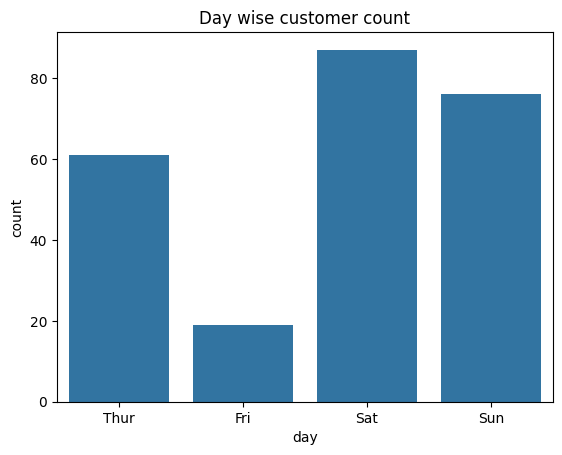

In [156]:
sns.countplot(data=df,x="day")
plt.title("Day wise customer count")
plt.show()

- Saturday is the busiest day, followed by Sunday, indicating higher customer traffic during weekends.

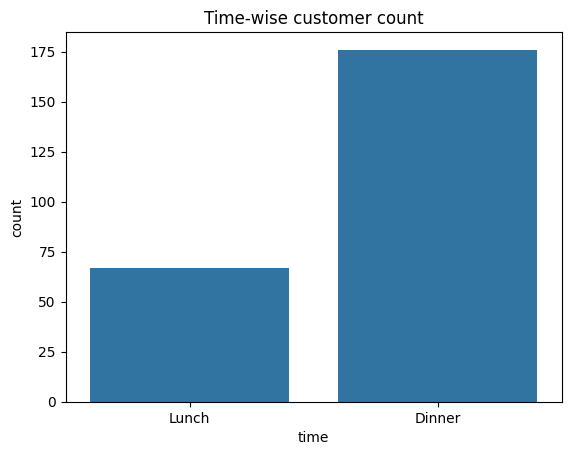

In [157]:
sns.countplot(data=df,x="time")
plt.title("Time-wise customer count")
plt.show()

- Dinner is the preferred dining time among customers.

As weekends are the busiest days, the following analysis explores which time period contributes most to weekend customer traffic.

In [158]:
print(pd.crosstab(df["day"],df["time"]))

time  Lunch  Dinner
day                
Thur     60       1
Fri       7      12
Sat       0      87
Sun       0      76


- During weekends, customers predominantly prefer dinner over lunch, making weekend dinner the busiest time period.

[]

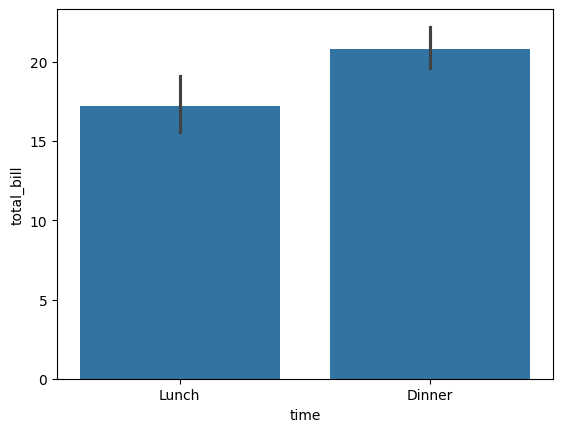

In [159]:
sns.barplot(data=df,x="time",y="total_bill")
plt.plot()

- Time alone does not show a strong impact on average total bill.

[]

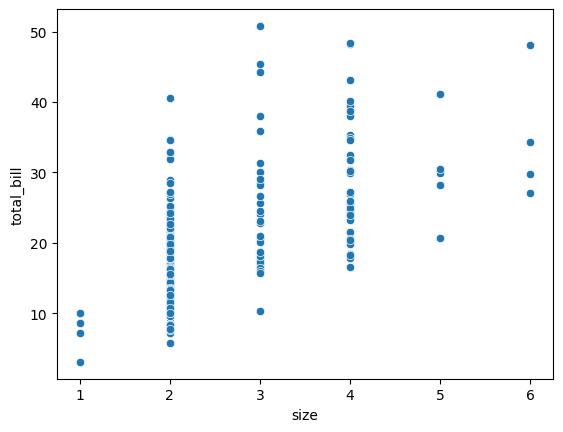

In [160]:
sns.scatterplot(data=df,x="size",y="total_bill")
plt.plot()

In [161]:
print(df["size"].corr(df["total_bill"]))

0.597588931065721


- There is a moderate positive correlation between group size and total bill, indicating that larger groups tend to generate higher bills, though group size alone does not fully explain spending behavior.
- Some group sizes have fewer observations, so results should be interpreted cautiously.

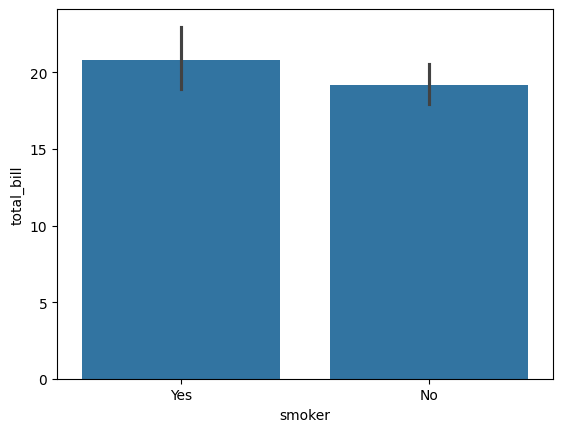

In [162]:
sns.barplot(data=df,x="smoker",y="total_bill")
plt.show()

- Smoking status does not show a significant impact on the average total bill amount.

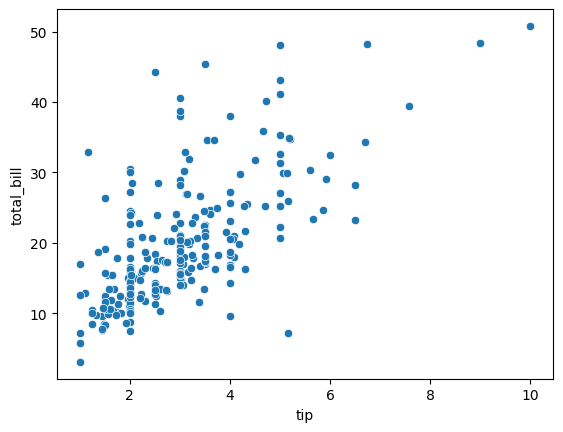

In [163]:
sns.scatterplot(data=df,x="tip",y="total_bill")
plt.show()

In [164]:
print(df["tip"].corr(df["total_bill"]))

0.6749978565456074


- There is a moderate positive relationship between total bill and tip amount, indicating that customers who spend more tend to give higher tips, though tipping behavior is influenced by additional factors.

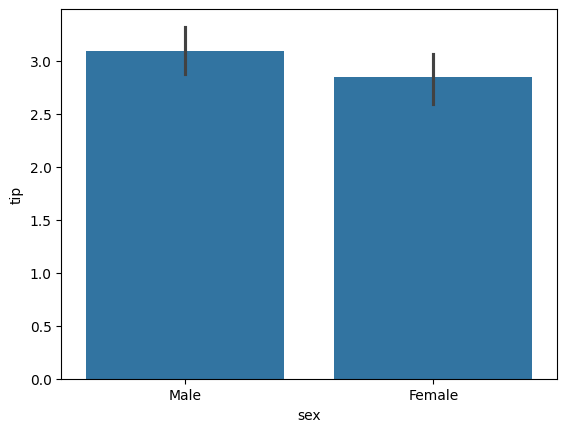

In [165]:
sns.barplot(data=df,x="sex",y="tip")
plt.show()

- Gender does not show a significant impact on the average tip amount.

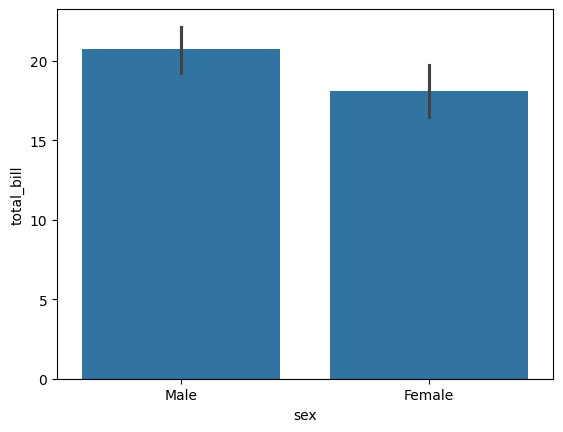

In [166]:
sns.barplot(data=df,x="sex",y="total_bill")
plt.show()

- No meaningful difference is observed in average total bill amounts across genders.

In [167]:
print(pd.crosstab(df["time"],df["smoker"]))

smoker  Yes   No
time            
Lunch    22   45
Dinner   70  106


In [168]:
print(pd.crosstab(df["day"],df["smoker"]))

smoker  Yes  No
day            
Thur     16  45
Fri      15   4
Sat      42  45
Sun      19  57


- The distribution of smokers and non-smokers across days and times does not indicate a reduction in customer count due to smoking preference.

#### **Step 6: Business findings:**
- Weekend dinners represent the peak operational period for the restaurant.
- Dinner is the most preferred dining time among customers.
- Group size shows a moderate positive relationship with total bill amount.
- Higher total bills are generally associated with higher tip amounts.
- A significant portion of revenue is generated during weekend dinner hours, indicating a strong concentration of business activity within a limited time window.

#### **Step 7: Recommendations:**

- Weekend dinner hours are the most critical period for business operations; therefore, experienced staff should be allocated during this time.
- More offers or schemes for family or group customers will increase the business revenue.


#### **Step 8: Conclusion:**
This exploratory analysis identified key patterns in customer behavior, highlighting weekend dinner periods as the primary revenue drivers. The findings can help optimize staffing, promotions, and service focus to maximize operational efficiency and revenue.